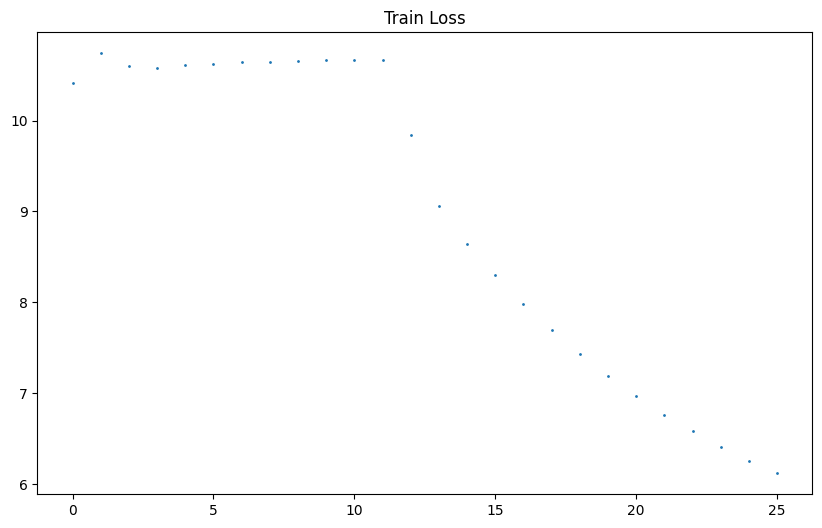

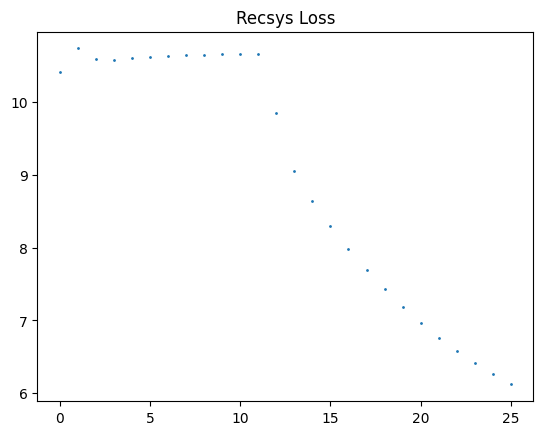

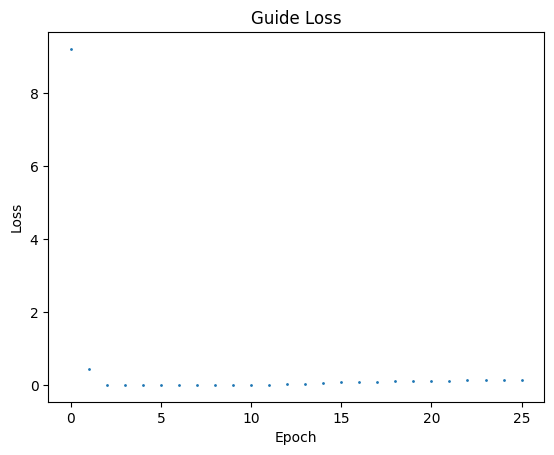

/var/folders/z2/vgcrr0vn72sbq744fflbbxp00000gn/T/ipykernel_26105/1856248994.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


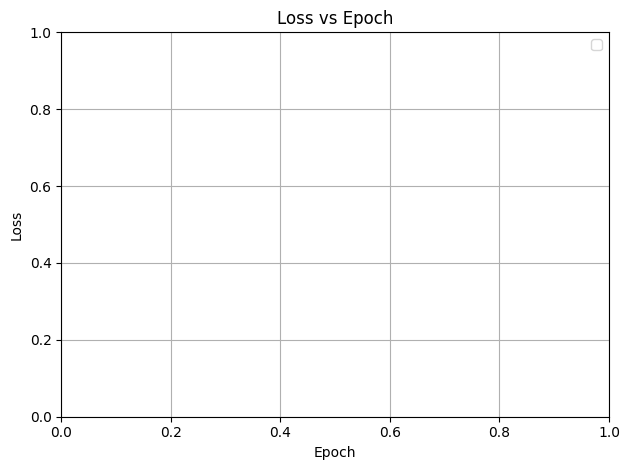

In [2]:
import re
import matplotlib.pyplot as plt

# Name of your log file
log_filename = "viz.out"

# Lists to store parsed values
epochs = []
train_loss = []
recsys_loss = []
guide_loss = []

# Regular expression pattern to extract the epoch and losses.
# This pattern assumes the log line contains something like:
# "Epoch: <epoch>/<total> | Train Total Loss: <train>  | Recsys Total Loss | <recsys> | Guide Total Loss | <guide>"
pattern = re.compile(
    r"Epoch:\s*(\d+)\s*/\s*\d+\s*\|\s*Train Total Loss:\s*([\d\.]+).*?Recsys Total Loss\s*\|\s*([\d\.]+).*?Guide Total Loss\s*\|\s*([\d\.]+)",
    re.IGNORECASE
)

# Open and parse the log file
with open(log_filename, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            t_loss = float(match.group(2))
            r_loss = float(match.group(3))
            g_loss = float(match.group(4))
            
            epochs.append(epoch)
            train_loss.append(t_loss)
            recsys_loss.append(r_loss)
            guide_loss.append(g_loss)

# Check if we have parsed any data
if not epochs:
    print("No matching log lines found. Please check the log format or regex pattern.")
else:
    # Plot the losses versus epochs
    plt.figure(figsize=(10, 6))
    plt.title("Train Loss")
    plt.scatter(epochs, train_loss, label="Train Loss", s=1)
    plt.show()
    plt.title("Recsys Loss")
    plt.scatter(epochs, recsys_loss, label="Recsys Loss", s=1)
    plt.show()
    plt.title("Guide Loss")
    plt.scatter(epochs, guide_loss, label="Guide Loss", s=1)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

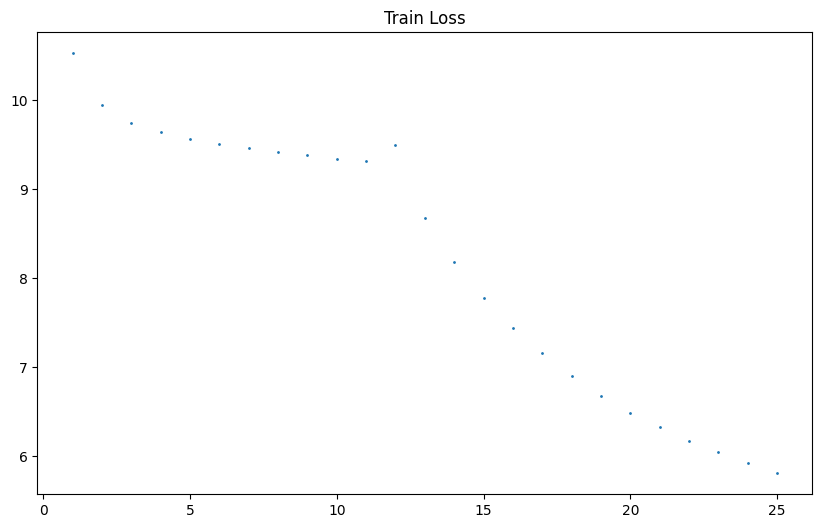

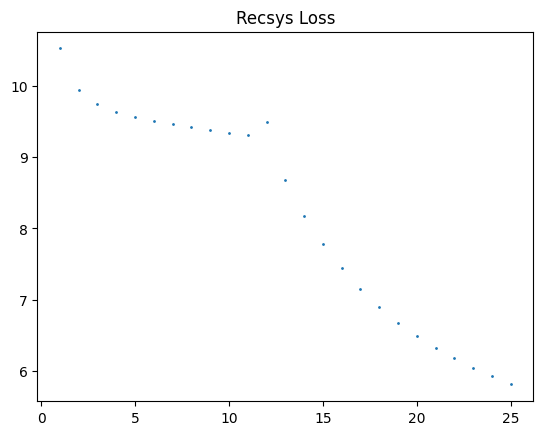

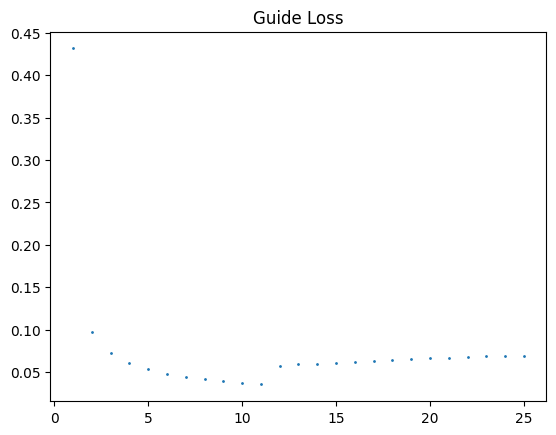

/var/folders/z2/vgcrr0vn72sbq744fflbbxp00000gn/T/ipykernel_35645/1858773306.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


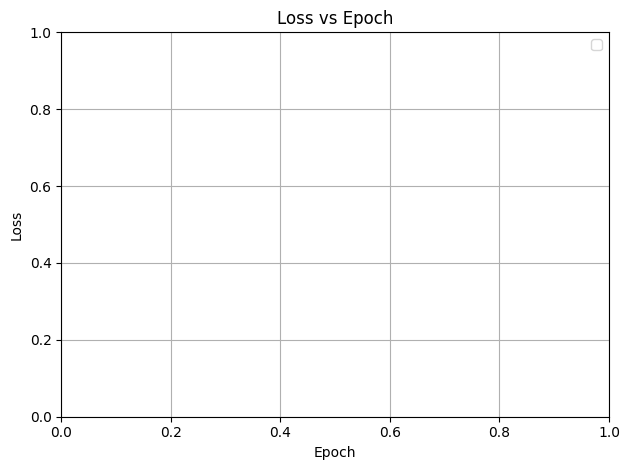

In [6]:
import re
import matplotlib.pyplot as plt

# Name of your log file
log_filename = "mean_true.out"

# Lists to store parsed values
epochs = []
train_loss = []
recsys_loss = []
guide_loss = []

# Regular expression pattern to extract the epoch and losses.
# This pattern assumes the log line contains something like:
# "Epoch: <epoch>/<total> | Train Total Loss: <train>  | Recsys Total Loss | <recsys> | Guide Total Loss | <guide>"
pattern = re.compile(
    r"Epoch:\s*(\d+)\s*/\s*\d+\s*\|\s*Train Total Loss:\s*([\d\.]+).*?Recsys Total Loss\s*\|\s*([\d\.]+).*?Guide Total Loss\s*\|\s*([\d\.]+)",
    re.IGNORECASE
)

# Open and parse the log file
with open(log_filename, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            t_loss = float(match.group(2))
            r_loss = float(match.group(3))
            g_loss = float(match.group(4)) - r_loss
            
            epochs.append(epoch)
            train_loss.append(t_loss)
            recsys_loss.append(r_loss)
            guide_loss.append(g_loss)

# Check if we have parsed any data
if not epochs:
    print("No matching log lines found. Please check the log format or regex pattern.")
else:
    # Plot the losses versus epochs
    plt.figure(figsize=(10, 6))
    plt.title("Train Loss")
    plt.scatter(epochs, train_loss, label="Train Loss", s=1)
    plt.show()
    plt.title("Recsys Loss")
    plt.scatter(epochs, recsys_loss, label="Recsys Loss", s=1)
    plt.show()
    plt.title("Guide Loss")
    plt.scatter(epochs, guide_loss, label="Guide Loss", s=1)
    plt.show()
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

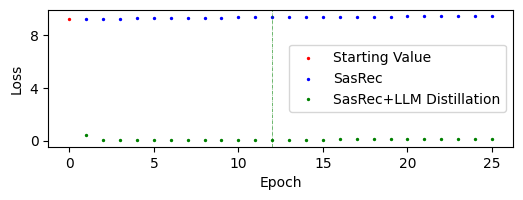

In [62]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Name of your log file

def read_file(filename):
    # Lists to store parsed values
    epochs = []
    train_loss = []
    recsys_loss = []
    guide_loss = []
    
    # Regular expression pattern to extract the epoch and losses.
    # This pattern assumes the log line contains something like:
    # "Epoch: <epoch>/<total> | Train Total Loss: <train>  | Recsys Total Loss | <recsys> | Guide Total Loss | <guide>"
    pattern = re.compile(
        r"Epoch:\s*(\d+)\s*/\s*\d+\s*\|\s*Train Total Loss:\s*([\d\.]+).*?Recsys Total Loss\s*\|\s*([\d\.]+).*?Guide Total Loss\s*\|\s*([\d\.]+)",
        re.IGNORECASE
    )
    
    # Open and parse the log file
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                epoch = int(match.group(1))
                t_loss = float(match.group(2))
                r_loss = float(match.group(3))
                g_loss = float(match.group(4))
                
                epochs.append(epoch)
                train_loss.append(t_loss)
                recsys_loss.append(r_loss)
                guide_loss.append(g_loss)
    return guide_loss


log_filename = "viz.out"
guide_loss_llm = read_file('llm.out')
guide_loss_sasrec = read_file('sasrec.out')

# Check if we have parsed any data
if not epochs:
    print("No matching log lines found. Please check the log format or regex pattern.")
else:
    # Plot the losses versus epochs
    plt.figure(figsize=(6, 4))
    plt.scatter([epochs[0]], [guide_loss_llm[0]], label="Starting Value", s=2, color='red')
    plt.scatter(epochs[1:], guide_loss_sasrec[1:], label="SasRec", s=2, color='blue')
    plt.scatter(epochs[1:], guide_loss_llm[1:], label="SasRec+LLM Distillation", s=2, color='green')
    plt.axvline(x=12, color='green', linestyle='-.', linewidth=0.4)  # Red dashed line at y=12

    # ax = plt.gca()  # Get current axis
    # ax.set_aspect(1.5)  # Adjust the aspect ratio
    ax = plt.gca()
    ax.set_aspect(0.78)  # Increase for a flatter plot

    plt.yticks(np.arange(0, 10, 4))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    # plt.title("Distil Loss vs Epoch")
    plt.legend()
    plt.show()